Para el desarrollo de este proyecto utilizaremos el dataset 'US Cars Dataset' disponible en Kaggle, donde realizaremos una exploración, entendimiento, preparación, análisis y visualización de los datos 

El conjunto de datos del 'US Cars Dataset' cuenta con múltiples variables:

| Feature | Type	| Description | 
| --- | --- | --- |
| Price | 	Integer  | The sale price of the vehicle in the ad |
|Years |	Integer |	The vehicle registration year |
| Brand	| String |	The brand of car |
| Model |	String |	model of the vehicle|
| Color |	String |	Color of the vehicle |
| State/City |	String |	The location in which the car is being available for purchase|
| Mileage |	Float |	miles traveled by vehicle |	
| Vin |	String |	The vehicle identification number is a collection of 17 characters (digits and capital letters)|	
| Title Status |	String |	This feature included binary classification, which are clean title vehicles and salvage insurance |
| Lot |	Integer |	A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number. |
|Condition |	String |	Time |

1. entendimiento del negocio 
  a. Objetivo del negocio y situacion actual  
  b. Objetivo del proyecto
  c. Planeacion del proyecto
2. Entendimiento de los datos
  a. Adqisicion e integracion de los datos
  b. analisis exploratorio de los datos
  c. descripciones generales
  d. analisis con estadistica descriptiva
  e. visualizacion de datos estadisticos
3. Preparacion de los datos
  a. Limpieza de datos
  b. Seleccion de caracteristicas
  c. Preprocesamiento y transformacion
4. Analisis de datos
  a. Tecnicas estadisticas tradicionales
  b. Analisis de correlacion y/o regresion 
  c. Analisis de resultados y cumplimiento de objetivos
5. Visualizacion de datos
  a. Abstraccion y definicion de visualizacines
  b. Visualizacion de informacion estatica e interactiva

  

In [365]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 1.Situacion actual 
---
Es claro que hoy en día USA es una de las potencias mundiales mas impactantes en el globo terráqueo, por ende su industrialización ha sido tan grande que ha generado un país con una adquisición bien significativa por habitante. 

Dentro de este marco se encuentra uno de los activos principales por habítate, este son los vehículos, donde tiene un papel muy importante en la vida norteamericana debido a las grandes distancias que hay entre lugares. Siendo así, según [D10.mx](https://de10.com.mx/vivir-bien/los-5-paises-con-mas-automoviles-en-el-mundo) afirma que en el país norteamericano cuenta con 965 vehículos por cada 1000 habitantes, lo cual ya es catalogada como el país con mas vehículos en circulación.


## Objetivo del negocio
Un Colombiano decidió emprender en los Estados unidos montando su propio concesionario de autos, sin embargo no sabe que tipos de carros debería priorizar en su concesionario, debido a que el valor de estos varían teniendo en cuenta la marca, precio, año y kilometraje. Así que el dueño identifico una gran base de datos donde en el encuentra información como:

'Precio', 'Marca', 'Modelo', 'Año', 'Estado', 'Millas', 'Color', 'Vin', 'Lot', 'Estado', 'País', 'Condición'

Esta base de datos es de gran ayuda para que su socio logre realizar un buen análisis de los autos que mas tienen los habitantes y así poder generar una lista de los autos potenciales a estar en el cocesionario de Los Ángeles 

## Objetivo del proyecto
1. Poder poner en practica las herramientas aprendidas en el modulo para el análisis de datos.
2. Realizar un entregable de valor, donde teniendo en cuenta el objetivo del negocio busca realizar la correcta exploración de los datos, análisis y visualización, donde esta se pueda mostrar al dueño y el de manera fácil pueda tomar decisiones respaldada por los datos y hechos. 

## Planeación del proyecto
1. Exploración de los datos.
2. Limpieza de los datos (si se requiere).
3. Modificación de los datos teniendo en cuenta el. conocimiento del dueño.
4. Análisis estadístico descriptivo basándonos en la marca y modelo de los autos.
5. Análisis inferencial teniendo en cuenta que la .población del país es de alrededor de 316000000, y solamente se cuenta con una base de datos de alrededor 2000 filas.
6. Análisis de correlación. 
7. Visualización de los datos relevantes para a toma de decisiones. 

# 2.Adquisición e integración de los datos
---

In [366]:
df = pd.read_csv('USA_cars_datasets.csv')

#3.Análisis exploratorio de los datos
---

In [367]:
df.info() # información de cada columna 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [368]:
df.isnull().sum() # Validación de que no hay datos faltantes 

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [369]:
df.shape # 2499, 13
df.size #32487

32487

La diferencia entre un Salvage insurance y un Clean Vehicles es que el Salvage Insurence es un vehículo que en el pasado ha sufrid un daño significativo, por ende, su precio va a ser bastante cómodo para ser verdad. Por tal razón si uno quiere un auto que este a un 100% fuera de problemas en temas mecánicos la ejor opción será Clean Vehicles

In [370]:
df['brand'].unique().size # úumero de marcas de autos 28
df[df['title_status'] != 'clean vehicle' ].shape[0] # número de salvage insurance 163
df[df['title_status'] == 'clean vehicle' ].shape[0] # número de clean vehicle  2336
df['state'].unique().size # Tenemos carros de 44 estados 
df['price'].min(),df['price'].max() # Encontramos rangos de precios entre (0, 84900) USD
unprice = df[df['price']== 0] # 43 autos que no tiene precio, solo 2 de ellos son Vehicle Clean

In [371]:
same_lot = df.groupby('lot').count()
same_lot[same_lot['Unnamed: 0'] == 2].index # mismos lotes [167650632, 167650636, 167650663, 167781794]
min_km, max_kl = df['mileage'].min(), df['mileage'].max() # Tenemos carros (0.0, 1638205.1) kilometros
min_year, max_year = df['year'].min(), df['year'].max() # Tenemos autos (1973, 2020)

In [372]:
n_model = df.groupby('model').count()
n_model.shape[0] # tenemos 127 tipos de modelos 
n_model['Unnamed: 0'].idxmax(), n_model['Unnamed: 0'].max() # tenemos que el modelo Door es el modelo que mas se vende, teniendo 651 ejemplares

('door', 651)

##3.1 Descripciones generales
De esta exploración de los datos podemos ver varias cosas:

*   El DataSet que se tiene no tiene datos nulos ni faltantes, por ende es un DataSet completo 
*   De las 2500 filas encontramos solamente 28 marcas de autos diferentes
*   El salvage insurance y clean vehicle son dos variables importantes ya que dependiendo del enfoque que se le quiera dar al concesionarios se puede dividir la cantidad de estos 
*   De igual forma solo obtenemos información de 44 estados diferentes de 50
*   Hay vehículos de gran variedad en temas de precio y kilometraje, teniendo en cuenta que solo hay del periodo (1973, 2020)
*   El modelo que mas se esta vendiendo hoy en día es el Ford Door







#4.Análisis con estadistica descriptiva y visualización de datos
---



Basados en la media, mediana y desviación, de datos catégoricos y no catégoricos

In [373]:
sns.set_style("whitegrid")
plt.style.use('ggplot')

In [374]:
df_sts_desc = df.describe().round(0)
df_sts_desc.iloc[1:3:1, 1:4:1] # Variables de interes

,price,year,mileage
mean,18768.0,2017.0,52299.0
std,12116.0,3.0,59706.0


In [375]:
data_interest_table = df.iloc[:, [1,4,5,6]]
data_interest_table.head(3)

,price,year,title_status,mileage
0,6300,2008,clean vehicle,274117.0
1,2899,2011,clean vehicle,190552.0
2,5350,2018,clean vehicle,39590.0


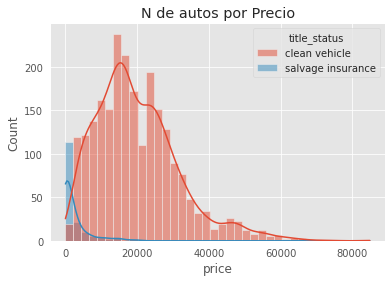

In [376]:
price_mean = sns.histplot(data= df, x = df['price'], kde=True, hue='title_status',)
plt.title('N de autos por Precio');

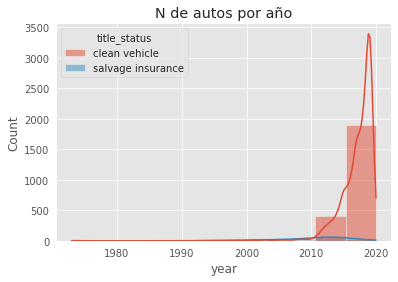

In [377]:
year_mean = sns.histplot(data= df, x = df['year'], kde=True, hue='title_status', bins=10)
plt.title('N de autos por año');

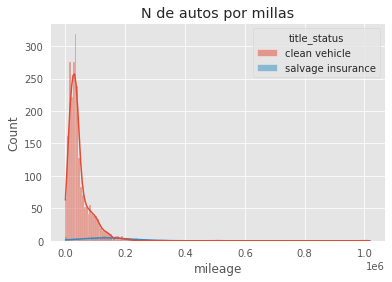

In [378]:
km_mean = sns.histplot(data= df, x = df['mileage'], kde=True, hue='title_status')
plt.title('N de autos por millas');

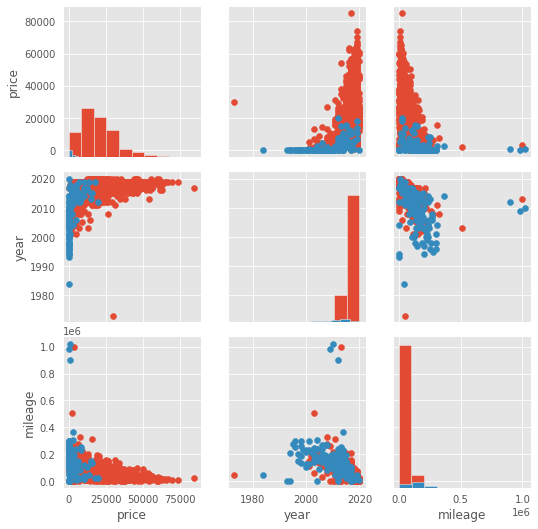

In [379]:
g = sns.PairGrid(df.iloc[:, [1,4,5,6]], hue='title_status')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(plt.scatter)


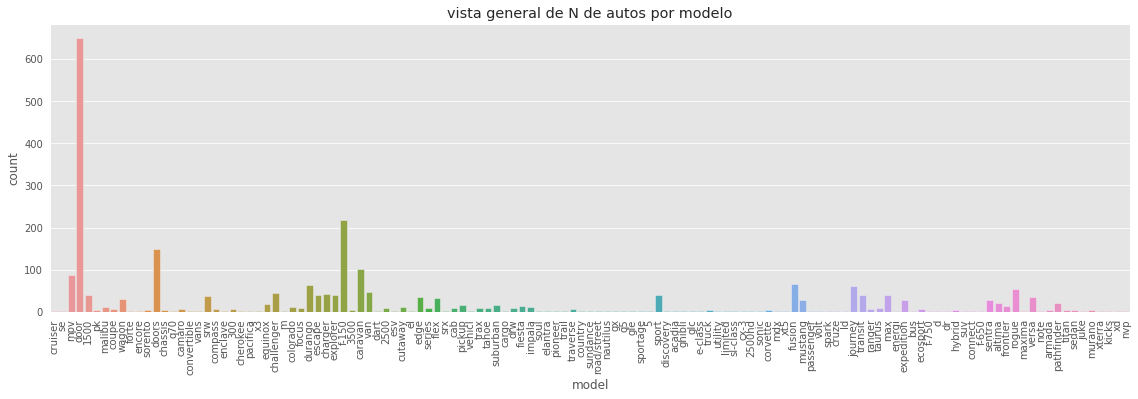

In [380]:
model_mode = sns.countplot(x= df['model'], data=df, )
plt.xticks(rotation = 90)
plt.subplots_adjust(left=1, bottom=1, right=3.5, top=2)
plt.title('vista general de N de autos por modelo');

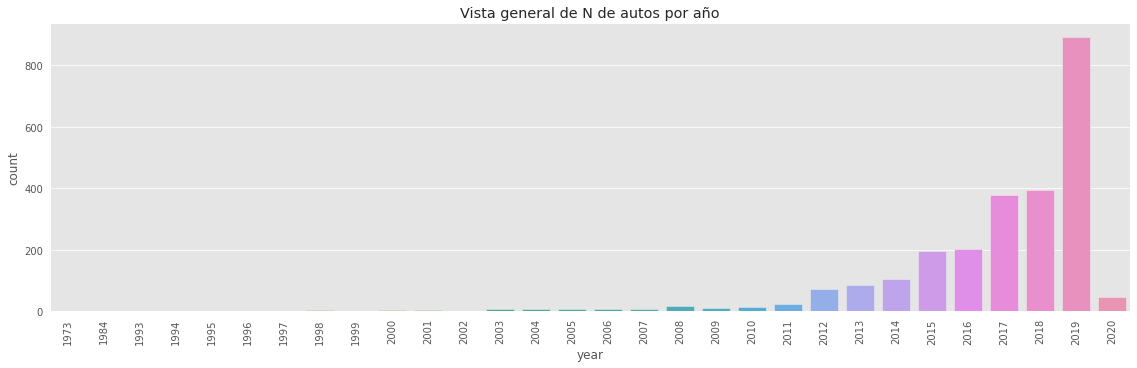

In [381]:
year_mode = sns.countplot(x= df['year'], data=df, )
plt.xticks(rotation = 90)
plt.subplots_adjust(left=1, bottom=1, right=3.5, top=2)
plt.title('Vista general de N de autos por año');

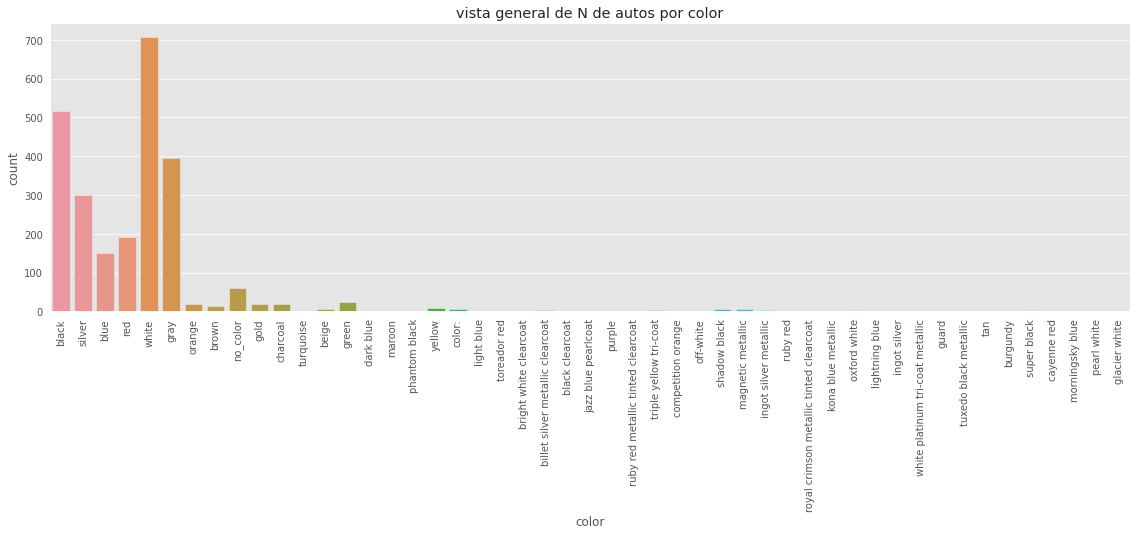

In [382]:
color_mode = sns.countplot(x= df['color'], data=df, )
plt.xticks(rotation = 90)
plt.subplots_adjust(left=1, bottom=1, right=3.5, top=2)
plt.title('vista general de N de autos por color');

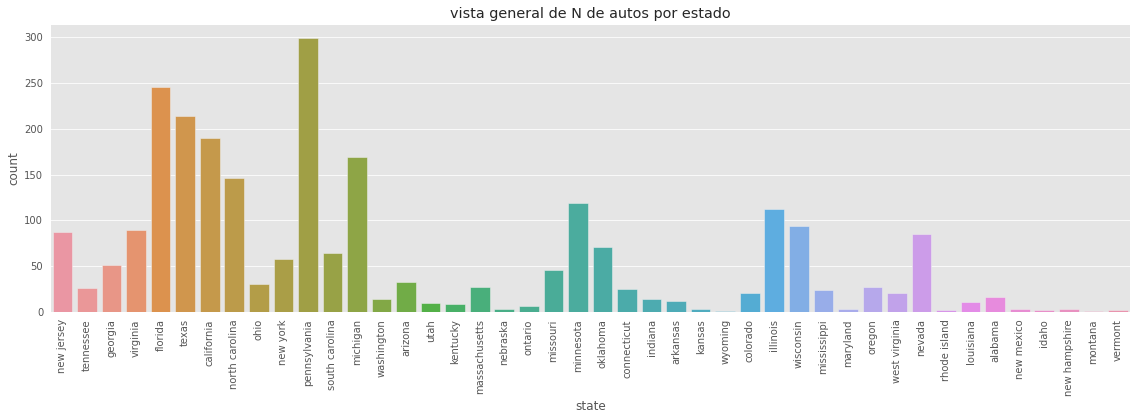

In [383]:
color_mode = sns.countplot(x= df['state'], data=df, )
plt.xticks(rotation = 90)
plt.subplots_adjust(left=1, bottom=1, right=3.5, top=2)
plt.title('vista general de N de autos por estado');

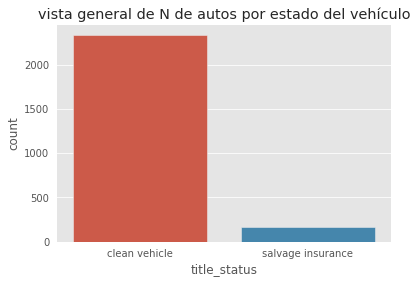

In [384]:
color_mode = sns.countplot(x= df['title_status'], data=df )
plt.title('vista general de N de autos por estado del vehículo');

##4.1 Descripciones Generales

#5.Preparación de los datos
---

##5.1 Modificación Columna Unnamed: 0 y millas
Esta modificación se realiza teniendo en cuenta que el emprendedor es un colombiana, por ende, el tipo de madición que más maneja es Kilometros en vez de millas. Por otro lado tenemos la columna Unnamed: 0, que simplemente es la posición de la celda. Por tal razón vamos a nombrarla N

In [385]:
df['mileage'] = df['mileage'].apply(lambda x: x*1.60934 ).round(1)
df.rename(columns= {'mileage': 'kilometer', 'Unnamed: 0': 'N'}, inplace= True)

##5.2 Datos Atípicos o no coherentes. 
como logramos observar en la exploración de los datos, se identificaron datos que tienen un precio de 0. Por el momento no se encontró razón coherente para que estos tengan un valor de 0. Sin embargo estos valores no serian de ningún interés para nuestro objetivo del proyecto, puesto que se busca identificar cuales son las marcas mas potenciales para generar mayor ganancias en un concesionario. Así que se va a eliminar estos datos, ya que al mismo tiempo se consideran ruido que esta afectando mucho el promedio del precio de los carros

In [386]:
unprice.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
141,141,0,dodge,van,2008,salvage insurance,177948.0,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left
144,144,0,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left
196,196,0,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left
285,285,0,ford,door,2000,salvage insurance,124969.0,black,1fafp34p7yw270338,167251902,oklahoma,usa,17 hours left
290,290,0,mazda,door,2009,salvage insurance,117541.0,gray,jm3er293590215768,167543177,indiana,usa,16 hours left


In [387]:
new_df = df.drop(unprice.index, axis=0) 
new_df[new_df['price']== 0]

,N,price,brand,model,year,title_status,kilometer,color,vin,lot,state,country,condition


##5.3 Selección potencial de tablas
Posterior mente en el análisis de los datos se considera que se va a hacer uso de tablas especificas, por tal razón se va a empezar a generar las diferentes tablas, estas son:

|precio| año | Estado_vehiculo | Km |
|---|---|---|---|

---

|Marca| precio promedio | km promedio | año promedio | Estado_vehiculo |
|---|---|---|---|---|

|Marca| N  |
|---|---|

---

|Estado | precio promedio | km promedio | año promedio | Estado_vehiculo |
|---|---|---|---|---|

|Estado| N  |
|---|---|

---

|Modelo | precio promedio | km promedio | año promedio | Estado_vehiculo |
|---|---|---|---|---|

|Modelo| N  |
|---|---|

---

|Año | precio promedio | km promedio | Estado_vehiculo |
|---|---|---|---|

|Año| N  |
|---|---|

---

|Color| N  |
|---|---|

---

|Estado_veiculo| N  |
|---|---|

---

|precio| año | Km |
|---|---|---|

In [388]:
numeric_table = new_df.iloc[:,[1,4,5,6]]

brand_mean = new_df.groupby('brand').mean()
brans_n = new_df.groupby('brand').count().iloc[:,0]

state_mean = new_df.groupby('state').mean()
state_n = new_df.groupby('state').count().iloc[:,0]

model_mean = new_df.groupby('model').mean()
model_n = new_df.groupby('model').count().iloc[:,0]

ano_mean = new_df.groupby('year').mean()
ano_n = new_df.groupby('year').count().iloc[:, 0]

color_n = new_df.groupby('color').count().iloc[:,0]

title_status_n = new_df.groupby('title_status').count().iloc[:,0]

numeric_table2 = new_df.iloc[:,[0,1,4,6]]

#6.Análisis de los datos
---
Para realizar el análisis de datos primero vamos a abordarlo desde la estadistica descriptiva, mirando temas de correlaciín y regresión, ya despues tocaremos temas de estadistica inferencial. 

##6.1 Autos más vendidos (15)
1. Agrupamos por marca de auto.
2. Ordenamos de mayor a menor para conocer los 15 autos más vendidos.
3. Seleccionamos las marcas que están en el anuncio de venta 10 veces o más.
4. Graficamos para ver visualmente aquellos que más están a la venta.

In [389]:
cars = brans_n.sort_values(ascending=False) #ver cuales eran las marcas mas vendidas
cars_2_graph = brans_n[brans_n >= 10]

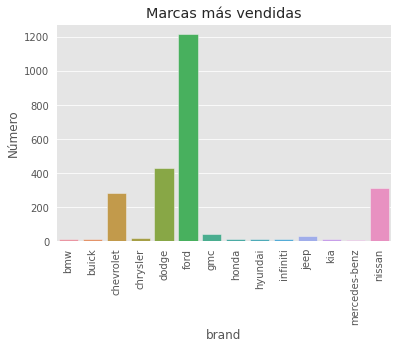

In [390]:
cars_2_graph = pd.Series.to_frame(cars_2_graph)
sns.barplot(x= cars_2_graph.index, y = cars_2_graph['N'], data= cars_2_graph )
plt.xticks(rotation = 90)

plt.title('Marcas más vendidas')
plt.ylabel('Número');

5. Extraemos los indices de la tabla de los carros más vendidos para poder conocer el precio, año y Km promedio junto con su desviación.   
6. Se graficó el precio promedio de todo los autos más vendidos y el precio promedio por marca.

In [391]:
brand_mean_filter = pd.Series(cars_2_graph.index).array
brand_mean__brans_n = brand_mean.loc[brand_mean_filter]
brand_mean__brans_n.describe().iloc[1:3:1, 1:4].astype('int64')

,price,year,kilometer
mean,15875,2016,80779
std,7247,1,26269


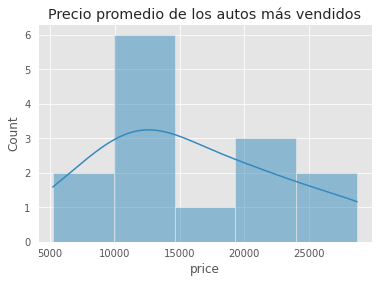

In [392]:
mean_price__brans_n = brand_mean__brans_n['price'].mean() #15875.90193455802
sns.histplot(data= brand_mean__brans_n, x = brand_mean__brans_n['price'], kde=True, )
plt.title('Precio promedio de los autos más vendidos');

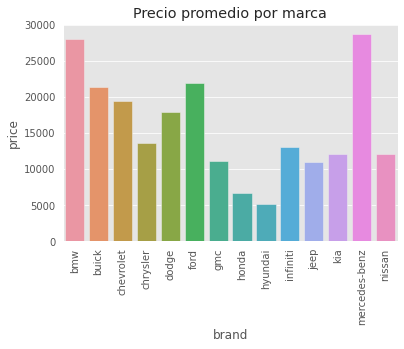

In [393]:
sns.barplot(x=brand_mean__brans_n.index, y='price', data=brand_mean__brans_n )
plt.xticks(rotation = 90)
plt.title('Precio promedio por marca');

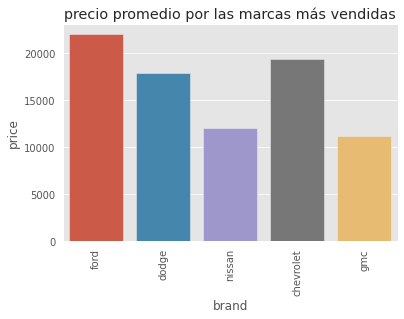

In [394]:
sns.barplot(x=brand_mean.loc[cars[:5].index].index, y='price', data=brand_mean.loc[cars[:5].index] )
plt.xticks(rotation = 90)
plt.title('precio promedio por las marcas más vendidas');

####6.1.1 CONCLUSIONES

Aca podemos realizar un análisis tanto en la marca como el moodelo y el precio. 

1. Podemos darnos cuenta que entre los carros mas vendidos en USA están las marcas Ford, Doge, Nissan, Chevrolet y GMC. Pero que sean las más vendidas no quiere decir que sean la que tienen mayor precio. Para esto están las marcas Mercedes-benz, BMW, Ford, Buick y Chevrolet.

2. Sin Embargo, de los autos que más son vendidos en USA de mayor a menor precio promedio está: Ford, Chevrolet, Doge, Nissan, GMC.

3. Por último, de la marca de autos más vendidos, estos tienen un precio promedio de $15875 USD y en promedio son del año 2016 con 80mil kilometros.

Los Datos nos están diciendo esta informacion, teniendo en cuenta que estamos contando con los dos tipos de estados de carro, sin embargo, al investigar en la web podemos darnos cuenta que no estamos desfasados en ningun aspecto, ya que ese si serie el precio promedio y el kilometraje para los autos de ese pais teniendo encuenta las grandes distancias de las autopistas.

##6.2 Año de los autos que más se tienen y ver que autos son.

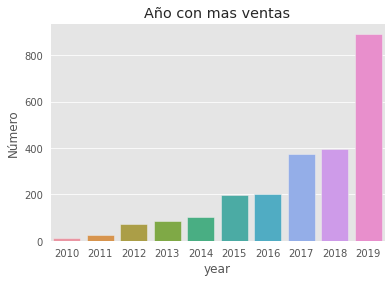

In [395]:
ano_2_graph = ano_n[(ano_n.index >= 2010)&(ano_n.index < 2020)].to_frame()
sns.barplot(x = ano_2_graph.index, y= 'N', data=ano_2_graph)

plt.title('Año con mas ventas')
plt.ylabel('Número');

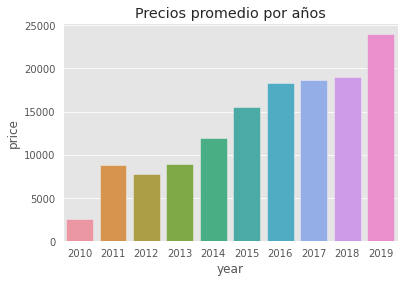

In [396]:
ano_mean_graph = ano_mean[(ano_mean.index >= 2010)&(ano_mean.index < 2020)]
sns.barplot(x = ano_mean_graph.index, y = 'price' , data=ano_mean_graph)

plt.title('Precios promedio por años');

In [397]:
new_df[new_df['year'] == 2019].groupby('brand').count().iloc[:, 0].sort_values(ascending=False)[:5:1]

brand
ford         476
dodge        226
nissan        74
chevrolet     56
jeep          26
Name: N, dtype: int64

###6.2.1 CONCLUSIONES

En este ejercicio se desprecio el año 2020 porque la base de datos fue compartida en mayo del mismo año, por tal razón los datos no estarían en las mismas condiciones que los anteriores. Ademas se ve que hay una tendencia de crecimiento, por ende, se puede ver que el mercado esta creciendo significativamente.

1. Estos datos nos hacen ver y confirmar el análisis realizado anteriormente, donde los autos más vendidos en USA, son Ford, Doge, Nissan y Chevrolet.

##6.3 Análisis por estados.

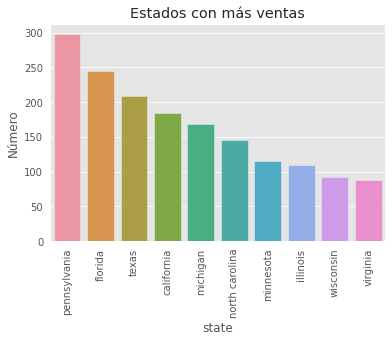

In [398]:
state_n_graph = state_n.sort_values(ascending=False).to_frame().head(10)
sns.barplot(data=state_n_graph, x=state_n_graph.index, y='N')
plt.xticks(rotation = 90)

plt.title('Estados con más ventas')
plt.ylabel('Número');

In [399]:
new_df[new_df['state']=='california'].describe().astype('int64').iloc[[0,1,2,7], [1,2,3]]

,price,year,kilometer
count,185,185,185
mean,18318,2017,64150
std,11736,1,43489
max,63200,2020,279383


### 6.3.1 CONCLUSIONES

Como el emprendedor va a lanzar su concesionario en California, con estos datos podemos ver como está el mercado en dicho estado. 

1. De la base de datos que se obtuvo, California es el 4 estado con más ventas de carros, ademas de esto podemos ver que en dicho estado el precio promedio de los automoviles es de $18.318 USD con una desviasión estandar de $11.763 USD. Así que es un mercado con gran potencial en el ambito automovilistico.

###6.3.2 Precio de los autos de california con estadistica inferencial

Se quiere conocer si este es el promedio de precio de autos para el estado de california como hipotesis nula. 

para un nivel de significancia de ($\alpha = 0.05$)

$meanPrice = $18318 USD 

In [400]:
alpha = 0.05
z_score, p_valor = sm.stats.ztest(pd.Series(new_df[new_df['state']=='california']['price']).array, 
                                  value = pd.Series(new_df[new_df['state']=='california']['price']).mean() , 
                                  alternative = "larger")

print(f"Estadístico: {z_score}\np-valor: {p_valor}")
p_valor > alpha

Estadístico: 0.0
p-valor: 0.5


True

No tenemos suficiente evidencia para rechazar la $h_o$, es decir que nuestro $P_v$ > $\alpha$. Por ende podemos confirmar que el precio de los autos en el estado de California esta en lo mencionado anteriormente

##6.4 Correlaciones 

### 6.4.1 Correlacion Kilometro Año

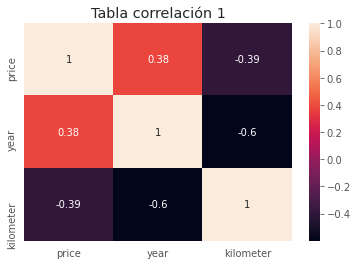

In [401]:
sns.heatmap(numeric_table2.iloc[:,1:].corr(),
            annot=True)
plt.title('Tabla correlación 1');

In [402]:
r_KA = numeric_table2['kilometer'].corr(numeric_table2['year'])

In [403]:
out1 = numeric_table2[(numeric_table2['kilometer'] > 750000)]
out1

,N,price,year,kilometer
490,490,475,2012,1451690.7
528,528,1025,2010,1638205.1
531,531,2000,2003,817520.6
1827,1827,3200,2013,1609338.4


In [404]:
out2 = numeric_table2[(numeric_table2['year'] < 1990)]
out2

,N,price,year,kilometer
32,32,29800,1973,74393.4
405,405,25,1984,66911.5


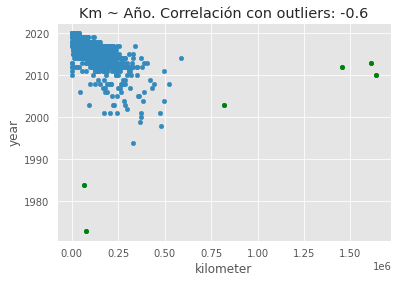

In [405]:
singular_correlation = numeric_table2.plot.scatter('kilometer', 'year', title= f'Km ~ Año. Correlación con outliers: {r_KA:.2}')
out1.plot.scatter('kilometer','year', color='green' , ax=singular_correlation)
out2.plot.scatter('kilometer','year', color='green' , ax=singular_correlation);

En la grafica podemos identificar 4 valores atípicos que son los identificados en la tabla. Estos datos afectan nuestro coeficiente de correlación, por ende, eliminar estos datos podriamos ver si la relación es más significativa.

In [406]:
outliers = pd.merge(out1,out2,how='outer')

In [407]:
mask = pd.Series(outliers['N']).array
numeric_table2_cleaned = numeric_table2.drop(mask, axis=0)

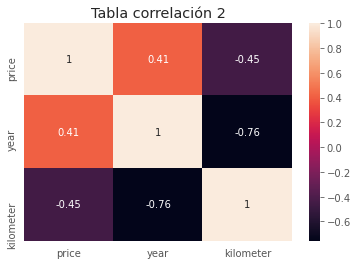

In [408]:
sns.heatmap(numeric_table2_cleaned.iloc[:,1:].corr(),
            annot=True)
plt.title('Tabla correlación 2');

In [409]:
r_KA = numeric_table2_cleaned['kilometer'].corr(numeric_table2_cleaned['year'])

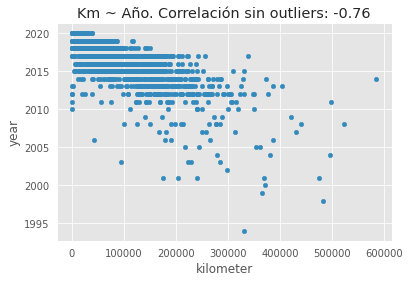

In [410]:
singular_correlation = numeric_table2_cleaned.plot.scatter('kilometer', 'year', title= f'Km ~ Año. Correlación sin outliers: {r_KA:.2}');

Como logramos observar, el coeficiente de correlación mejoro, por ende, en esta grafica podemos seguir eliminando esos outliers y aun así nuestro coeficiente de correlacion mejoraria, veamoslo rapidamente.

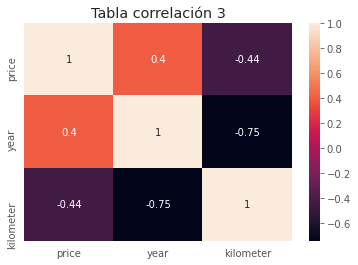

In [411]:
out1 = numeric_table2_cleaned[(numeric_table2_cleaned['kilometer'] > 400000)]
out2 = numeric_table2_cleaned[(numeric_table2_cleaned['year'] < 2005)]
outliers = pd.merge(out1,out2,how='outer')
mask = pd.Series(outliers['N']).array
numeric_table2_cleaned_2 = numeric_table2_cleaned.drop(mask, axis=0)
sns.heatmap(numeric_table2_cleaned_2.iloc[:,1:].corr(),
            annot=True)
plt.title('Tabla correlación 3');

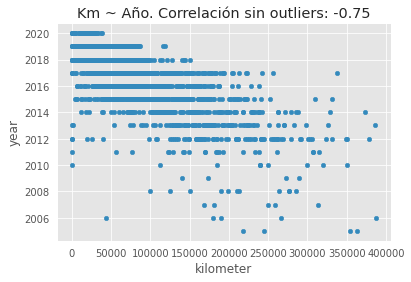

In [412]:
r_KA = numeric_table2_cleaned_2['kilometer'].corr(numeric_table2_cleaned_2['year'])
singular_correlation = numeric_table2_cleaned_2.plot.scatter('kilometer', 'year', title= f'Km ~ Año. Correlación sin outliers: {r_KA:.2}');

In [413]:
def correlacion_pearson_con_significancia(x, y, alfa=0.05):
  coef, p = stats.pearsonr(x, y)
  print(f'Coeficiente de correlación de Pearson: {coef:.2f}')
  if p > alfa:
    print(f'Las muestras no están correlacionadas (no rechazar H0) (p = {p:.2f})')
  else:
    print(f'Las muestras están correlacionadas (rechazar H0) (p = {p:.2f})')

In [414]:
correlacion_pearson_con_significancia(numeric_table2_cleaned_2['kilometer'], numeric_table2_cleaned_2['year'])

Coeficiente de correlación de Pearson: -0.75
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


#### 6.4.1.1 CONCLISIONES
Nuesto Coeficiente no mejoro significativamente, asi que vamos a dejar nuestra tabla desde la primera limpieza y podremos concluir que hay una relación inversa entre si. Esto tambien lo podemos ver gracias al análisis de correlación con significancia, la cuál nos dice Rechazar $h_o$, es decir que los datos si tienen una relación significativa. A madida que aumenten los años hay una tendencia de que el kilometraje tambien aumente.


### 6.4.2 Correlacion Precio Kilometro

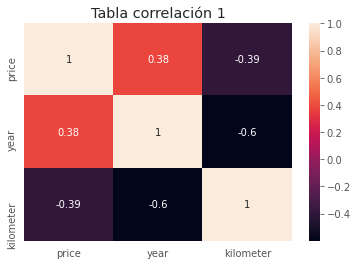

In [415]:
r_KP = numeric_table2['price'].corr(numeric_table2['kilometer'])
sns.heatmap(numeric_table2.iloc[:,1:].corr(),
            annot=True)
plt.title('Tabla correlación 1');

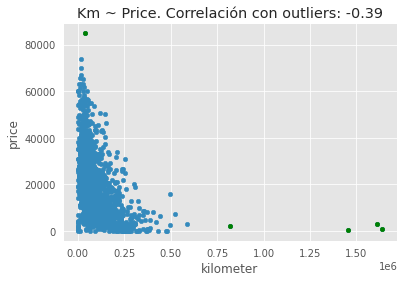

In [416]:
out1 = numeric_table2[(numeric_table2['kilometer'] > 750000)]
out2 = numeric_table2[(numeric_table2['price'] > 80000)]
singular_correlation = numeric_table2.plot.scatter('kilometer', 'price', title= f'Km ~ Price. Correlación con outliers: {r_KP:.2}')
out1.plot.scatter('kilometer','price', color='green' , ax=singular_correlation)
out2.plot.scatter('kilometer','price', color='green' , ax=singular_correlation);

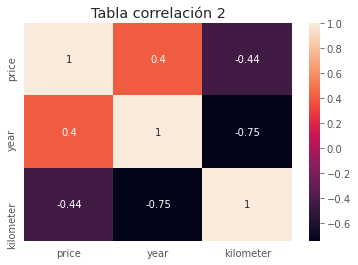

In [417]:
outliers = pd.merge(out1,out2,how='outer')
mask = pd.Series(outliers['N']).array
numeric_table2_cleaned = numeric_table2.drop(mask, axis=0)
r_KP = numeric_table2_cleaned['price'].corr(numeric_table2_cleaned['kilometer'])
sns.heatmap(numeric_table2_cleaned_2.iloc[:,1:].corr(),
            annot=True)
plt.title('Tabla correlación 2');

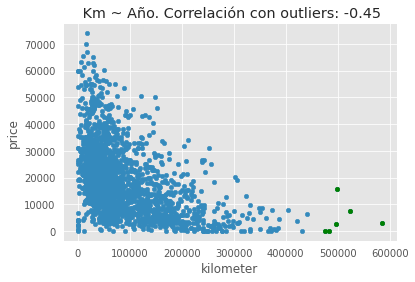

In [418]:
out1 = numeric_table2_cleaned[(numeric_table2_cleaned['kilometer'] > 450000)]
singular_correlation = numeric_table2_cleaned.plot.scatter('kilometer', 'price', title= f' Km ~ Año. Correlación con outliers: {r_KP:.2}')
out1.plot.scatter('kilometer','price', color='green' , ax=singular_correlation);

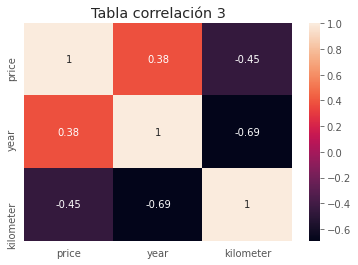

In [419]:
mask = pd.Series(out1['N']).array
numeric_table2_cleaned_2 = numeric_table2_cleaned.drop(mask, axis=0)
r_KP = numeric_table2_cleaned_2['kilometer'].corr(numeric_table2_cleaned_2['price'])
sns.heatmap(numeric_table2_cleaned_2.iloc[:,1:].corr(),
            annot=True)
plt.title('Tabla correlación 3');

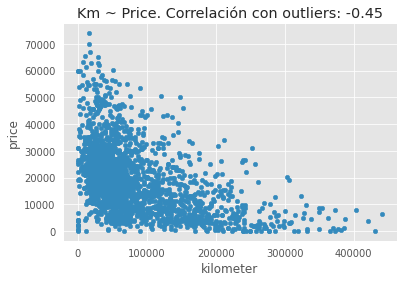

In [420]:
singular_correlation = numeric_table2_cleaned_2.plot.scatter('kilometer', 'price', title= f'Km ~ Price. Correlación con outliers: {r_KP:.2}');

In [421]:
correlacion_pearson_con_significancia(numeric_table2_cleaned['kilometer'], numeric_table2_cleaned['price'])

Coeficiente de correlación de Pearson: -0.45
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


#### 6.4.2.1 CONCLUSIONES
Nuesto Coeficiente no mejoro significativamente, así que vamos a dejar nuestra tabla desde la primera limpieza y podremos concluir que hay una relación inversa entre si, pero minima. Esto tambien lo podemos ver gracias al analisis de correlacion con significancia, la cual nos dice Rechazar $h_o$, es decir que los datos si tienen una relacion significativamente minima, ya que su coeficiente es -0.45. A medida que aumenta el kilometraje, el valor del vehículo no lo hace. por ende esta es la razon por la que los nuevos o los autos con menor Km son mas costosos

### 6.4.3 Correlación Año Precio

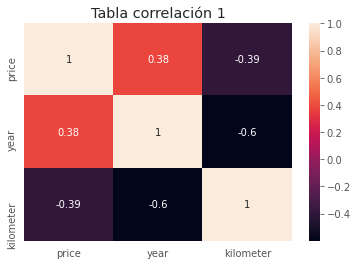

In [422]:
r_AP = numeric_table2['year'].corr(numeric_table2['price'])
r_AP,sns.heatmap(numeric_table2.iloc[:,1:].corr(),
            annot=True)
plt.title('Tabla correlación 1');

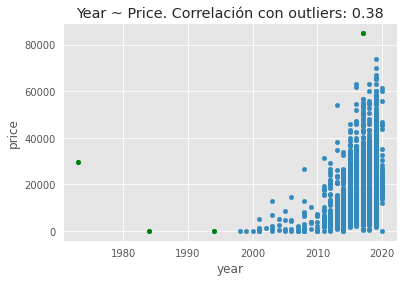

In [423]:
out1 = numeric_table2[(numeric_table2['year'] < 1995)]
out2 = numeric_table2[(numeric_table2['price'] > 80000)]
singular_correlation = numeric_table2.plot.scatter('year', 'price', title= f'Year ~ Price. Correlación con outliers: {r_AP:.2}')
out1.plot.scatter('year','price', color='green' , ax=singular_correlation)
out2.plot.scatter('year','price', color='green' , ax=singular_correlation);

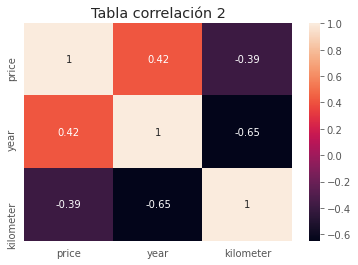

In [424]:
outliers = pd.merge(out1,out2,how='outer')
mask = pd.Series(outliers['N']).array
numeric_table2_cleaned = numeric_table2.drop(mask, axis=0)
r_AP = numeric_table2_cleaned['year'].corr(numeric_table2_cleaned['price'])
r_AP,sns.heatmap(numeric_table2_cleaned.iloc[:,1:].corr(),
            annot=True)
plt.title('Tabla correlación 2');

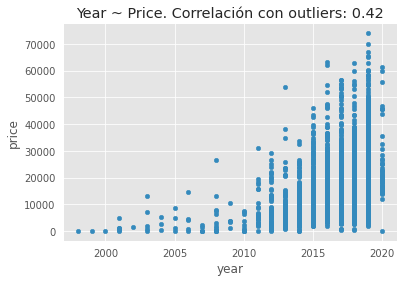

In [425]:
singular_correlation = numeric_table2_cleaned.plot.scatter('year', 'price', title= f'Year ~ Price. Correlación con outliers: {r_AP:.2}')

In [426]:
correlacion_pearson_con_significancia(numeric_table2_cleaned['year'],numeric_table2_cleaned['price'])

Coeficiente de correlación de Pearson: 0.42
Las muestras están correlacionadas (rechazar H0) (p = 0.00)


#### 6.4.3.1 CONCLUSIONES
Podemos ver que al realizar la limpieza de outliers nuestro coeficiente de correlación mejoro significativamente. Por tal razon podemos concluir la relación entre el precio y el año, donde nos dice que mas reciente sea el auto mayor valor monetario tiene. 

#7.Conclusiones finales

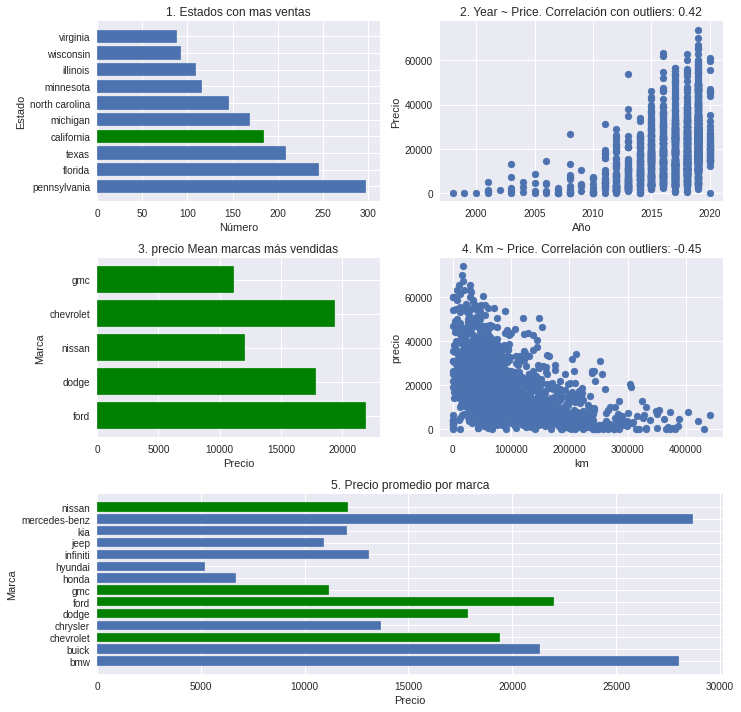

In [529]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot2grid((3,3), (0,0)) 
ax1.barh(state_n_graph.index, state_n_graph['N'])
ax1.barh(state_n_graph.index[3], state_n_graph['N']['california'], color = 'green')
ax1.set_title('1. Estados con mas ventas')
ax1.set_xlabel('Número')
ax1.set_ylabel('Estado')

ax2 = plt.subplot2grid((3,3), (0,1)) 
ax2.scatter(numeric_table2_cleaned['year'], numeric_table2_cleaned['price'])
ax2.set_title(f'2. Year ~ Price. Correlación con outliers: {r_AP:.2}')
ax2.set_xlabel('Año')
ax2.set_ylabel('Precio')

ax3 = plt.subplot2grid((3,3), (1,0))
ax3.barh(brand_mean.loc[cars[:5].index].index, brand_mean.loc[cars[:5].index]['price'], color = 'green') 
ax3.set_title('3. precio Mean marcas más vendidas')
ax3.set_xlabel('Precio')
ax3.set_ylabel('Marca') 

ax4 = plt.subplot2grid((3,3), (1,1))
ax4.scatter(numeric_table2_cleaned_2['kilometer'], numeric_table2_cleaned_2['price']) 
ax4.set_title(f'4. Km ~ Price. Correlación con outliers: {r_KP:.2}')
ax4.set_xlabel('km')
ax4.set_ylabel('precio')

ax5 = plt.subplot2grid((3,3), (2,0), colspan=2)
ax5.barh(brand_mean__brans_n.index, brand_mean__brans_n['price'] )
ax5.barh(brand_mean__brans_n.index[[2,4,5,6,13]], brand_mean__brans_n['price'][['chevrolet', 'dodge', 'ford', 'gmc', 'nissan']], color = 'green' ) 
ax5.set_title('5. Precio promedio por marca')
ax5.set_xlabel('Precio')
ax5.set_ylabel('Marca')

fig.tight_layout();

## 7.1 Conclusión final

Se le presentó al dueño el siguiente conjunto de graficas, donde se le explico lo siguiente. 

1. Como podemos observar en la grafica 1 de los 44 estados que se obtuvo la muestra, California se encuentra entre los 10 estados que mas realiza ventas de autos, es más, es el 4 estado que mas realiza ventas. Por ende, montar un concesionario en dicho estado es rentable, asi que si se le recomienda al emprendedor montarlo en el lugar que planeo desde un inicio. 

2. Tanto en la tabla 2 como en la 4 vemos dos graficas de relaciones. Esto nos quiere decir el precio - el año y el precio - Km presentan un indice de relaciones. Así qie por beneficio del negocio se recomienda tener un portafolio de vehículos no mas de 5 años del año presente,(2016 - 2021). De igual forma se le recomienda no manejar un portafolio de autos de no mas de 250000 km, ya que a mayor km el vehiculo tiende a perder valor. Esto fue recomendado para hacerle notar al emprendedor de que si sigue estas recomendaciones podria generar mas ganancias y entrar al mercado de una forma mas estrategica. 

3. En la tabla 15 vemos las marcas con precio promedio más alto, como podemos ver BMW tiene un precio promedio alto. Esto tambien es de tener en cuenta ya que es una marca con estilo exclusivo. 
si el emprendedor desea basarse en esas marcas es libre de tomar esa decision, ya que en ella puede ver las que posiblemente le de mas ganancias. Sin embargo en la tabla 3 mostramos las 5 marcas mas vendida en dicho país. Así que en recomendación se le dice al emprendedor que se base en grandes cantidades en autos de la marca expuesta en la tabla 3, posteriormente agregue autos a su portafolio de la tabla 5. Así podria generar un portafolio robusto con ganancias potenciales.  